In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
df = pd.read_csv('../Data/df_normalized_encoded.csv')

df.head()

,semi_major_axis,eccentricity,inclination,longitude_node,perihelion,perihelion_distance,aphelion_distance,orbital_period,data_arc,n_obs_used,absolute_magnitude,diameter,albedo,min_orbit_intersection,mean_motion,mean_anomaly,near_earth_object_N,near_earth_object_Y,physical_hazardous_asteroid_N,physical_hazardous_asteroid_Y
0,-0.507630,0.249189,-0.373376,-1.188765,-1.433350,-0.762226,-0.302052,-0.147092,8.133003,3.468336,-4.631043,9.155872,1.037744,-0.763128,0.700901,1.230759,0.077199,-0.077199,0.03832,-0.03832
1,-0.514063,-1.010012,-0.785863,-1.013740,-0.206433,-0.274327,-0.498700,-0.148760,8.054713,4.426078,-3.952145,6.852597,1.046813,-0.333389,0.714139,0.061231,0.077199,-0.077199,0.03832,-0.03832
2,-0.715834,-0.780444,-0.101824,0.162283,-0.472614,-0.645042,-0.592504,-0.200239,7.783764,3.327287,-4.211499,8.294674,0.638693,-0.687464,1.163836,0.327977,0.077199,-0.077199,0.03832,-0.03832
3,-0.869666,-1.045657,-1.381633,-0.099080,0.667505,-0.765284,-0.726954,-0.238404,6.846989,3.889743,-3.372412,4.875320,0.194296,-0.788116,1.558003,0.431769,0.077199,-0.077199,0.03832,-0.03832
4,-0.293410,-1.454459,-0.567600,-1.274602,-0.482708,0.224671,-0.432387,-0.090671,7.273796,3.154894,-4.585274,8.851156,0.928912,0.207375,0.293646,-1.605449,0.077199,-0.077199,0.03832,-0.03832


In [9]:
# Subset selection
features = ['diameter', 'data_arc', 'absolute_magnitude', 'albedo', 'min_orbit_intersection']

df = df[features]

In [10]:
df.corr()

,diameter,data_arc,absolute_magnitude,albedo,min_orbit_intersection
diameter,1.000000,0.491908,-0.736670,-0.200817,0.479004
data_arc,0.491908,1.000000,-0.627962,0.297693,-0.053604
absolute_magnitude,-0.736670,-0.627962,1.000000,-0.272602,-0.378228
albedo,-0.200817,0.297693,-0.272602,1.000000,-0.285879
min_orbit_intersection,0.479004,-0.053604,-0.378228,-0.285879,1.000000


# MLP

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('diameter', axis=1), df['diameter'], test_size=0.2, random_state=42)

# Fit multilayer perceptron model
mlp = MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=100, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on train set
y_pred_train = mlp.predict(X_train)

# Evaluate model performance on train set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Root Mean Squared Error Train Set:", rmse_train)

# Make predictions on test set
y_pred_test = mlp.predict(X_test)

# Evaluate model performance on test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print("Root Mean Squared Error Test Set:", rmse_test)
print("R^2 Score:", r2)
print("Adjusted R^2 Score:", adj_r2)


Root Mean Squared Error Train Set: 0.1640594631216902
Root Mean Squared Error Test Set: 0.17060577003312277
R^2 Score: 0.9716307819319739
Adjusted R^2 Score: 0.9716265795517839


# XGB

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split data into training and testing sets
X = df.drop('diameter', axis=1)
y = df['diameter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fit XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on train set
y_pred_train = xgb_model.predict(X_train)

# Evaluate model performance on train set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Root Mean Squared Error Train Set:", rmse_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

# Calculate adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print model performance metrics on test set
print("R-squared: ", r2)
print("Adjusted R-squared: ", adj_r2)
print("RMSE Test Set: ", rmse_test)


Root Mean Squared Error Train Set: 0.1326074322646322
R-squared:  0.9727286858334205
Adjusted R-squared:  0.9727246460875898
RMSE Test Set:  0.16371130694832972


# Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split data into training and testing sets
X = df.drop('diameter', axis=1)
y = df['diameter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fit Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions on train set
y_pred_train = gb_model.predict(X_train)

# Evaluate model performance on train set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Root Mean Squared Error Train Set:", rmse_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate R-squared, adjusted R-squared, and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
n = len(y_test)
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Print model performance metrics
print("R-squared: ", r2)
print("Adjusted R-squared: ", adj_r2)
print("Test RMSE: ", rmse)


Root Mean Squared Error Train Set: 0.16244070759060947
R-squared:  0.971684318923568
Adjusted R-squared:  0.971680124473903
Test RMSE:  0.1668165551090406


# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

# Split data into training and testing sets
X = df.drop('diameter', axis=1)
y = df['diameter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on train set
y_pred_train = lr_model.predict(X_train)

# Evaluate model performance on train set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print("Root Mean Squared Error Train Set:", rmse_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate R-squared, adjusted R-squared, and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
n = len(y_test)
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Print model performance metrics
print("R-squared: ", r2)
print("Adjusted R-squared: ", adj_r2)
print("Test RMSE: ", rmse)


Root Mean Squared Error Train Set: 0.5125818887044226
R-squared:  0.7272718439647792
Adjusted R-squared:  0.7272314442823683
Test RMSE:  0.51771485962695


# Bar Plot of RMSE's (test and train)

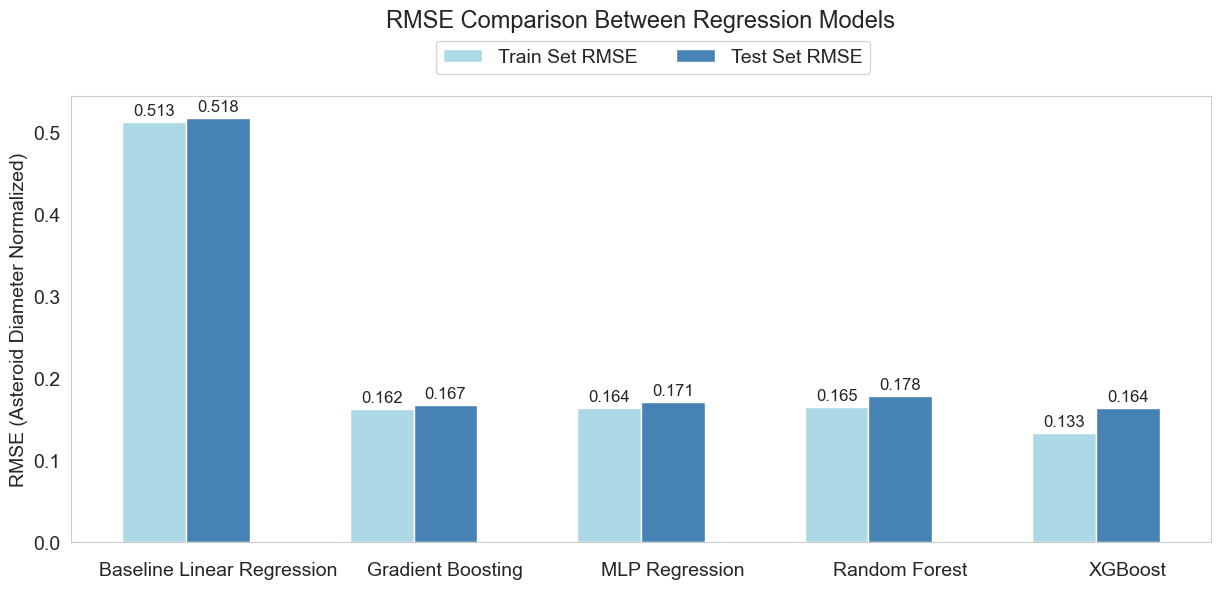

In [63]:
models = ['Baseline Linear Regression', 'MLP Regression', 'Gradient Boosting', 'XGBoost', 'Random Forest', 'Baseline Linear Regression', 'MLP Regression', 'Gradient Boosting', 'XGBoost', 'Random Forest']
#test_rmse = [0.518, 0.171, 0.167, 0.164, 0.178]
#train_rmse = [0.513, 0.164, 0.162, 0.133, 0.165]
rmse = [0.518, 0.171, 0.167, 0.164, 0.178, 0.513, 0.164, 0.162, 0.133, 0.165]
train_test = ['Test', 'Test', 'Test', 'Test', 'Test', 'Train', 'Train', 'Train', 'Train', 'Train']

df_rmse = pd.DataFrame({'models': models, 'rmse': rmse, 'train_test': train_test})

#reshape df from long to wide
df_rmse = df_rmse.pivot(index='models', columns='train_test', values='rmse')
df_rmse = df_rmse.reset_index()

#compute data array for plotting
labels = df_rmse['models']
category1 = df_rmse['Train']
category2 = df_rmse['Test']

#set x-axis ticks label location
x = np.arange(len(labels))

#set bar width
width = 0.28

#plot the chart
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, category1, width, edgecolor='white', label='Train Set RMSE', color='lightblue')
rects2 = ax.bar(x, category2, width, edgecolor='white', label='Test Set RMSE', color='steelblue')

#set chart title
ax.set_title('RMSE Comparison Between Regression Models', pad=50, fontsize=17)

#set x-axis tick and label and center it
ax.set_xticks(x, labels, fontsize=14, ha='center')

# shift x-axis ticks left

ax.tick_params(axis='x', =10)

#set chart legend and increase font size
ax.legend(loc=(0.32,1.05), ncol=2, fontsize=14)

# set formatted data label
ax.bar_label(rects1, labels=[x for x in rects1.datavalues], padding=3, size=12)
ax.bar_label(rects2, labels=[x for x in rects2.datavalues], padding=3, size=12)

#adjust chart margin and layout
fig.tight_layout()

# add y-axis label

ax.set_ylabel('RMSE (Asteroid Diameter Normalized)', fontsize=14)

# increase y-axis tick label size

ax.tick_params(axis='y', labelsize=14)

# remove grid lines for x-axis only

ax.grid(False)

#show chart
plt.show()

#plt.savefig('rmse_comparison.png', dpi=300)
